In [2]:
import pandas as pxndx
datos = pxndx.read_csv("housing.csv")

In [2]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

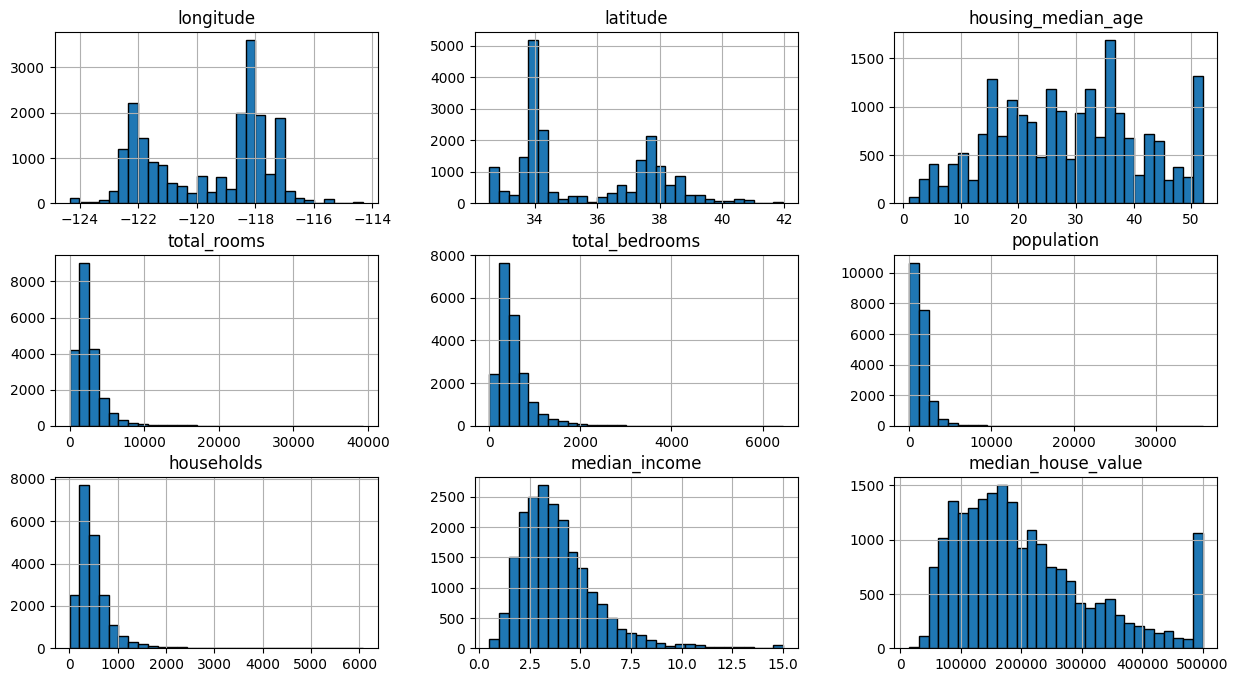

In [4]:
datos.hist(figsize=(15,8), bins=30, edgecolor="black")

<Axes: xlabel='latitude', ylabel='longitude'>

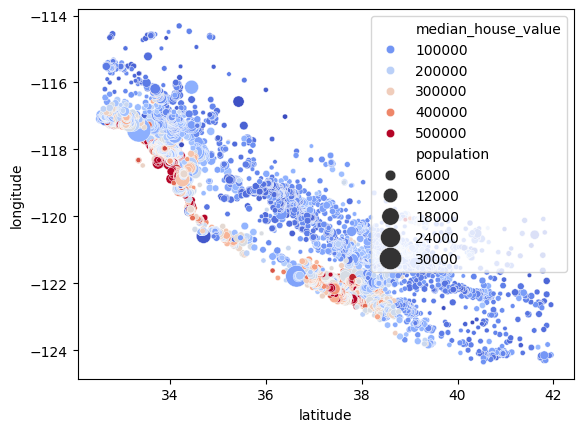

In [4]:
import seaborn as sb
sb.scatterplot(x="latitude", y="longitude", data=datos, 
               hue="median_house_value", palette="coolwarm",
               size="population", sizes=(10,300))

<Axes: xlabel='latitude', ylabel='longitude'>

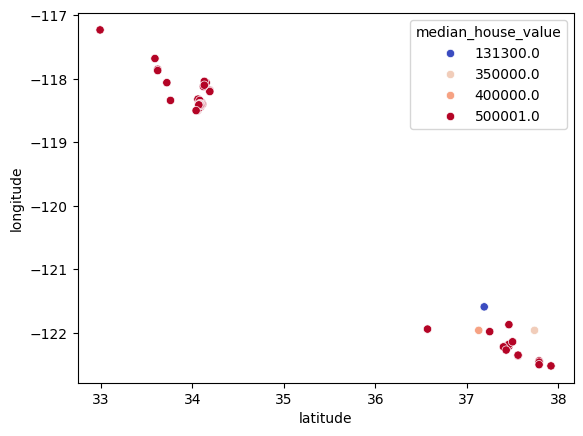

In [5]:
import seaborn as sb
sb.scatterplot(x="latitude", y="longitude", data=datos[(datos.median_income >14)], 
               hue="median_house_value", palette="coolwarm")

In [ ]:
datos.info() #muchos datos vacios...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
#Eliminamos los datos vacios innecesarios
datos_na = datos.dropna()

In [7]:
datos_na.info() #Ya estan todos los datos iguales

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [8]:
#Dummies hace que cuando encuentre un valor tru te regrese 1 sino 0
# Near Bay    Inland    Near Ocean
#    1           0           0
#    0           1           0
#    0           0           1
dummies= pxndx.get_dummies(datos_na["ocean_proximity"], dtype=int)

In [9]:
Datos_Oc= datos_na.join(dummies)

In [30]:
Datos_Oc.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [11]:
datos_ocelote= Datos_Oc.drop("ocean_proximity", axis=1)

In [35]:
datos_ocelote.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


<Axes: >

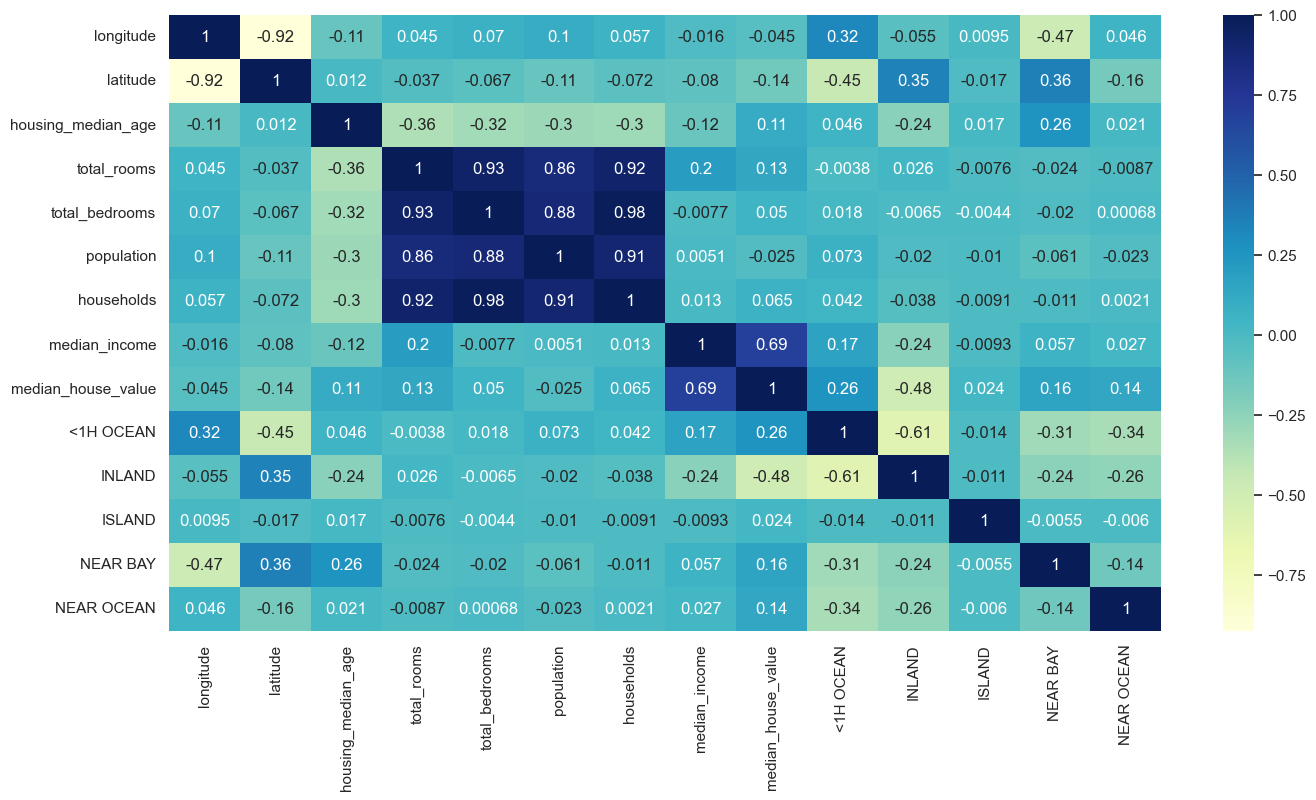

In [12]:
#Importante hacer esto para ver las relaciones de cada etiqueta y caracteristica
sb.set(rc={'figure.figsize': (16,8)})
sb.heatmap(datos_ocelote.corr(), annot=True, cmap="YlGnBu")

In [13]:
datos_ocelote.corr()["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688355
<1H OCEAN             0.257614
NEAR BAY              0.160526
NEAR OCEAN            0.140378
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
ISLAND                0.023525
population           -0.025300
longitude            -0.045398
latitude             -0.144638
INLAND               -0.484787
Name: median_house_value, dtype: float64

<Axes: xlabel='median_house_value', ylabel='median_income'>

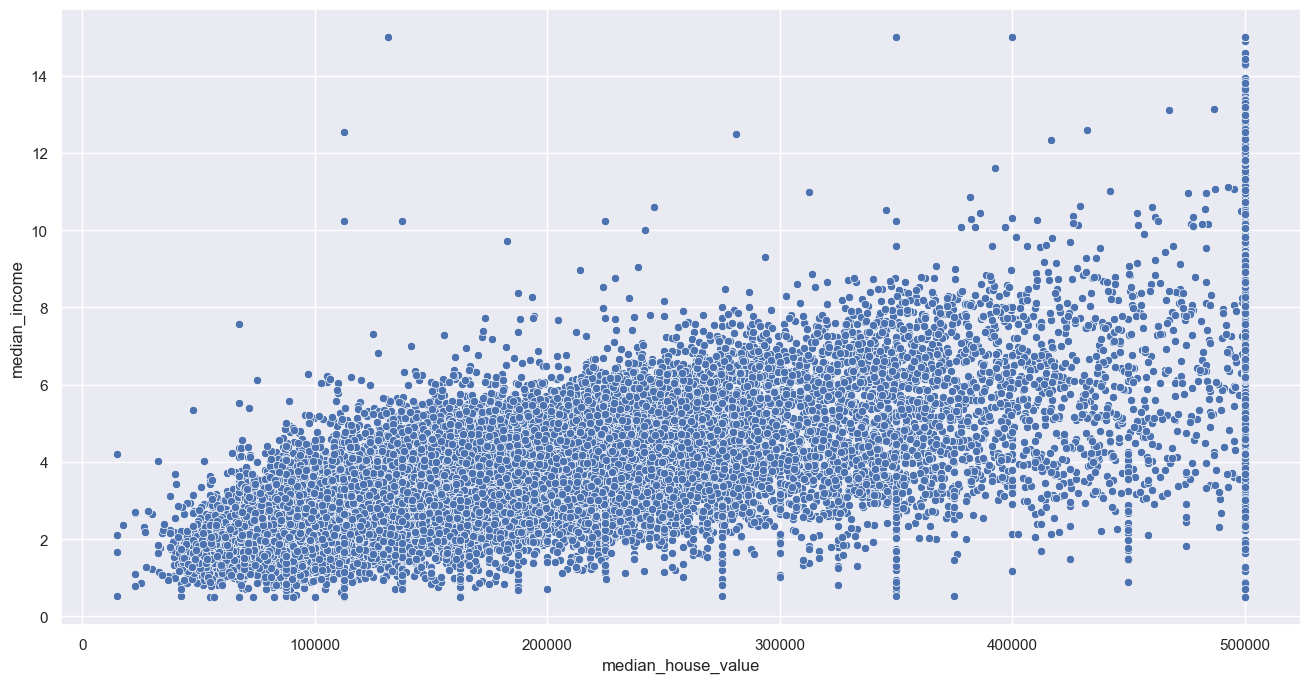

In [14]:
sb.scatterplot(x=datos_na["median_house_value"], y=datos_na["median_income"])

In [15]:
datos_ocelote["bedrooms_ratio"] = datos_ocelote["total_bedrooms"] / datos_ocelote["total_rooms"]

<Axes: >

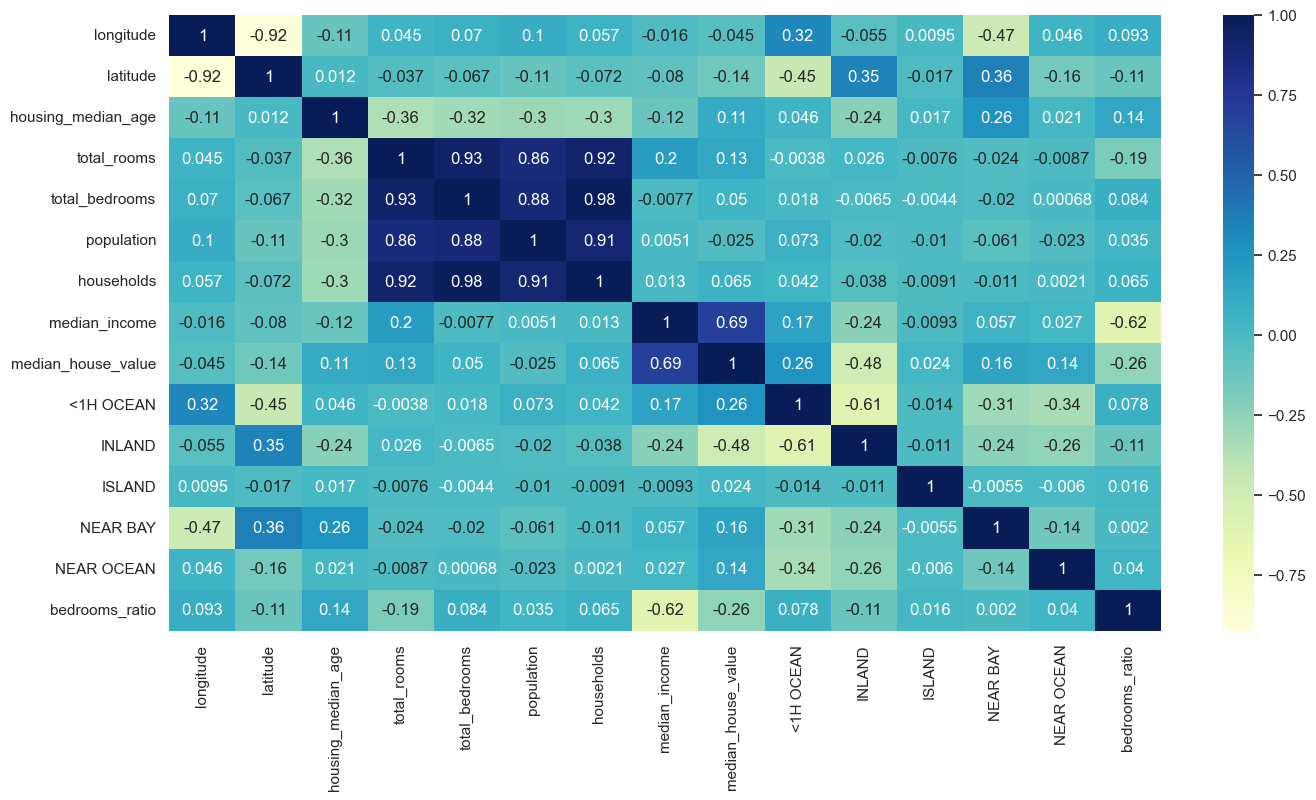

In [16]:
#Importante hacer esto para ver las relaciones de cada etiqueta y caracteristica
sb.set(rc={'figure.figsize': (16,8)})
sb.heatmap(datos_ocelote.corr(), annot=True, cmap="YlGnBu")

In [17]:
#Separar las caracteristicas de la etiqueta
X= datos_ocelote.drop(["median_house_value"], axis=1)
y= datos_ocelote["median_house_value"]

In [18]:
#Separar los datos en 2 partes: Conjunto de entrenamiento y uno de pruebas
from sklearn.model_selection import train_test_split
X_entr, X_pru, y_entr,y_pru=train_test_split(X,y, test_size=.2)

In [19]:
from sklearn.linear_model import LinearRegression
modelo= LinearRegression()

In [20]:
modelo.fit(X_entr,y_entr)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [21]:
Predicciones = modelo.predict(X_pru)

In [24]:
comparativa = {"Prediccion":Predicciones, "Valor 100% Real": y_pru}
pxndx.DataFrame(comparativa)

,Prediccion,Valor 100% Real
6012,140663.855865,113500.0
15894,213842.279091,189000.0
5743,270494.149005,318600.0
4537,172336.582079,145000.0
2377,48241.535381,58900.0
...,...,...
3224,92706.000332,60600.0
17892,225628.946799,199700.0
14019,214089.255913,243800.0
6415,155734.964607,187300.0


In [25]:
#Corregir el Error
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(y_pru,Predicciones)

In [26]:
mse

4428923818.159752

In [27]:
rmse= np.sqrt(mse)

In [28]:
rmse

np.float64(66550.16016629676)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_entr_escale= scaler.fit_transform(X_entr)
X_pru_escale= scaler.fit_transform(X_pru)

In [30]:
X_entr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedrooms_ratio
14064,-117.12,32.75,15.0,2671.0,724.0,1800.0,646.0,2.1394,0,0,0,0,1,0.271060
6287,-117.90,34.04,15.0,11989.0,2185.0,6652.0,2081.0,4.5554,1,0,0,0,0,0.182250
3408,-118.31,34.26,37.0,1444.0,246.0,624.0,239.0,5.7600,1,0,0,0,0,0.170360
13587,-117.29,34.12,47.0,1648.0,432.0,1308.0,385.0,1.2069,0,1,0,0,0,0.262136
6126,-117.92,34.11,24.0,2838.0,695.0,2151.0,645.0,3.2202,1,0,0,0,0,0.244891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5763,-118.29,34.16,42.0,413.0,107.0,349.0,107.0,4.3438,1,0,0,0,0,0.259080
8629,-118.39,33.88,35.0,1267.0,216.0,521.0,191.0,6.0441,1,0,0,0,0,0.170481
20057,-119.27,35.89,18.0,1855.0,424.0,1839.0,392.0,1.7572,0,1,0,0,0,0.228571
2286,-119.76,36.79,32.0,2463.0,468.0,1261.0,486.0,3.3281,0,1,0,0,0,0.190012


In [31]:
X_entr_escale

array([[ 1.21912769, -1.34796938, -1.08497468, ..., -0.35374803,
         2.6117145 ,  1.00208754],
       [ 0.82982558, -0.74266674, -1.08497468, ..., -0.35374803,
        -0.38289024, -0.53096188],
       [ 0.62519241, -0.63943683,  0.66296528, ..., -0.35374803,
        -0.38289024, -0.73621549],
       ...,
       [ 0.14605135,  0.12540293, -0.84661923, ..., -0.35374803,
        -0.38289024,  0.26864544],
       [-0.09851024,  0.54770709,  0.2657062 , ..., -0.35374803,
        -0.38289024, -0.39697568],
       [ 0.73998663, -0.82712757,  0.02735075, ..., -0.35374803,
        -0.38289024,  0.30788894]], shape=(16346, 14))

In [32]:
pxndx.DataFrame(X_entr_escale)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.219128,-1.347969,-1.084975,0.012918,0.432939,0.324182,0.377171,-0.917146,-0.891341,-0.682648,-0.017492,-0.353748,2.611715,1.002088
1,0.829826,-0.742667,-1.084975,4.249406,3.861418,4.552244,4.099288,0.363783,1.121905,-0.682648,-0.017492,-0.353748,-0.382890,-0.530962
2,0.625192,-0.639437,0.662965,-0.544946,-0.688767,-0.700592,-0.678510,1.002444,1.121905,-0.682648,-0.017492,-0.353748,-0.382890,-0.736215
3,1.134280,-0.705129,1.457483,-0.452196,-0.252287,-0.104550,-0.299813,-1.411544,-0.891341,1.464883,-0.017492,-0.353748,-0.382890,0.848046
4,0.819843,-0.709821,-0.369908,0.088845,0.364886,0.630045,0.374577,-0.344121,1.121905,-0.682648,-0.017492,-0.353748,-0.382890,0.550355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16341,0.635175,-0.686360,1.060224,-1.013696,-1.014954,-0.940229,-1.020893,0.251595,1.121905,-0.682648,-0.017492,-0.353748,-0.382890,0.795292
16342,0.585264,-0.817743,0.504062,-0.625420,-0.759167,-0.790347,-0.803013,1.153070,1.121905,-0.682648,-0.017492,-0.353748,-0.382890,-0.734121
16343,0.146051,0.125403,-0.846619,-0.358082,-0.271061,0.358167,-0.281657,-1.119783,-0.891341,1.464883,-0.017492,-0.353748,-0.382890,0.268645
16344,-0.098510,0.547707,0.265706,-0.081651,-0.167807,-0.145506,-0.037839,-0.286914,-0.891341,1.464883,-0.017492,-0.353748,-0.382890,-0.396976
